### 다중회귀란?

여러 개의 **독립변수(X₁, X₂, ..., Xₙ)**로 **종속변수(Y)**를 예측하는 기법입니다.

**수식**: `y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε`

### 단순 vs 다중회귀

- **단순회귀**: 공부시간 → 점수
- **다중회귀**: 공부시간 + 출석률 + 과제점수 → 점수

### 핵심 개념

1. **다중공선성(Multicollinearity)**: 독립변수들 간의 높은 상관관계 (문제가 됨)
2. **VIF(Variance Inflation Factor)**: 다중공선성 측정 (10 이상이면 문제)
3. **조정된 R²**: 변수 개수를 고려한 R² (변수가 많을수록 R²는 증가하므로)

### 실생활 예시

- 집값 예측: 면적 + 방 개수 + 위치 + 연식 → 가격
- 매출 예측: TV광고비 + 온라인광고비 + 시즌 → 매출
- 성적 예측: 공부시간 + 출석률 + 수면시간 → 점수

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 1. 데이터 생성 (집값 예측: 면적, 방개수, 연식)
np.random.seed(42)
n_samples = 100

area = np.random.randint(50, 200, n_samples)  # 면적 (㎡)
rooms = np.random.randint(1, 5, n_samples)    # 방 개수
age = np.random.randint(0, 30, n_samples)     # 연식 (년)

# 집값 = 면적*500 + 방개수*5000 - 연식*200 + 노이즈
price = (area * 500 + rooms * 5000 - age * 200 +
         np.random.normal(0, 10000, n_samples))

df = pd.DataFrame({
    '면적': area,
    '방개수': rooms,
    '연식': age,
    '가격': price
})

print("데이터 샘플:")
print(df.head(10))
print()
print("데이터 통계:")
print(df.describe())
print()

데이터 샘플:
    면적  방개수  연식            가격
0  152    2  19  84798.827942
1  142    3  16  90618.228718
2   64    3  29  28830.492891
3  156    1  16  66595.433869
4  121    3  25  75719.415656
5   70    1  19  39169.846732
6  152    3  11  91304.928503
7  171    2  29  93164.482095
8  124    3   6  68999.752784
9  137    1   1  75622.536972

데이터 통계:
               면적         방개수          연식             가격
count  100.000000  100.000000  100.000000     100.000000
mean   119.950000    2.490000   14.510000   70676.916486
std     42.128321    1.105496    9.448954   22792.394756
min     51.000000    1.000000    0.000000   25553.183298
25%     86.750000    1.000000    5.000000   53337.052693
50%    117.000000    3.000000   16.000000   69681.914697
75%    153.000000    3.000000   23.000000   90648.675947
max    199.000000    4.000000   29.000000  114539.190223



In [4]:
# 2. 상관관계 확인
print("상관계수:")
print(df.corr()['가격'].sort_values(ascending=False))
print()

상관계수:
가격     1.000000
면적     0.878852
방개수    0.115046
연식    -0.103209
Name: 가격, dtype: float64



In [5]:
# 3. 데이터 분리
X = df[['면적', '방개수', '연식']]
y = df['가격']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# 4. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# 5. 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [8]:
# 6. 결과 출력
print("=== 모델 계수 ===")
print(f"절편: {model.intercept_:,.0f}원")
for i, col in enumerate(X.columns):
    print(f"{col}의 계수: {model.coef_[i]:,.0f}원")
print()
print("=== 모델 성능 ===")
print(f"훈련 R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"테스트 R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"테스트 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):,.0f}원")
print()

=== 모델 계수 ===
절편: 4,825원
면적의 계수: 481원
방개수의 계수: 4,748원
연식의 계수: -291원

=== 모델 성능 ===
훈련 R²: 0.8237
테스트 R²: 0.7398
테스트 RMSE: 11,489원



In [9]:
# 7. 새로운 집값 예측
new_house = pd.DataFrame({
    '면적': [100],
    '방개수': [3],
    '연식': [5]
})
predicted_price = model.predict(new_house)
print(f"면적 100㎡, 방 3개, 연식 5년인 집의 예상 가격: {predicted_price[0]:,.0f}원")
print()

면적 100㎡, 방 3개, 연식 5년인 집의 예상 가격: 65,724원



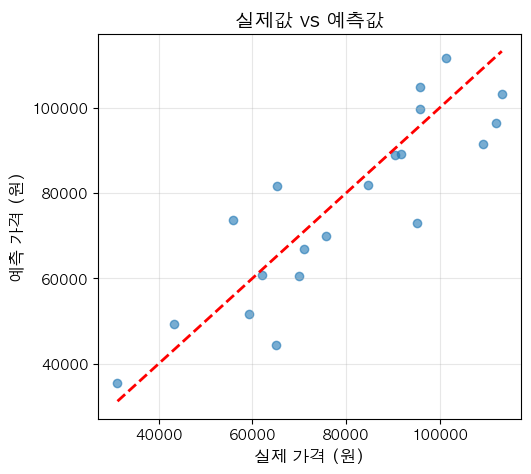

In [10]:
# 8. 시각화 1: 실제값 vs 예측값
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel('실제 가격 (원)', fontsize=12)
plt.ylabel('예측 가격 (원)', fontsize=12)
plt.title('실제값 vs 예측값', fontsize=14)
plt.grid(True, alpha=0.3)

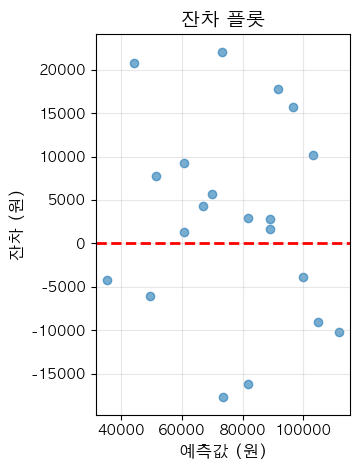

In [11]:
# 9. 시각화 2: 잔차 분포
residuals = y_test - y_pred_test
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('예측값 (원)', fontsize=12)
plt.ylabel('잔차 (원)', fontsize=12)
plt.title('잔차 플롯', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

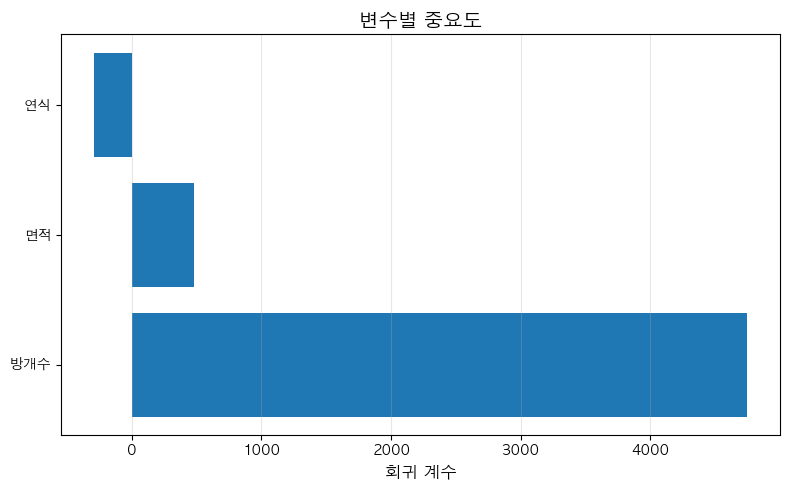

In [12]:
# 10. 변수 중요도 시각화
plt.figure(figsize=(8, 5))
importance = pd.DataFrame({
    '변수': X.columns,
    '계수': model.coef_
}).sort_values('계수', ascending=False)

plt.barh(importance['변수'], importance['계수'])
plt.xlabel('회귀 계수', fontsize=12)
plt.title('변수별 중요도', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 결과 해석

1. **계수 해석**:
    - 면적 계수 500: 면적 1㎡ 증가 시 가격 500원 증가
    - 방개수 계수 5000: 방 1개 증가 시 가격 5000원 증가
    - 연식 계수 -200: 연식 1년 증가 시 가격 200원 감소
2. **R² 비교**:
    - 훈련 R²와 테스트 R² 차이가 크면 과적합 가능성
3. **잔차 플롯**:
    - 잔차가 0을 중심으로 랜덤하게 분포하면 좋은 모델

## 주의사항

1. **변수가 많다고 좋은 건 아님**: 불필요한 변수는 모델을 복잡하게 만듦
2. **다중공선성 체크**: 독립변수끼리 상관관계가 높으면 문제
3. **스케일링**: 변수 범위가 다르면 정규화 필요 (다음 강의에서)